In [27]:
import pandas as pd

file_path = '/content/drive/My Drive/channew.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).str.strip()


if 'com' in df.columns:
    comments = df['com']
    print(comments.head())
else:
    print("Column 'com' not found in the dataset.")


Column 'com' not found in the dataset.


In [28]:

df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '', regex=True).str.strip()

comments_column = 'com'

if comments_column in df.columns:
    comments = df[comments_column]
    print("First few comments:")
    print(comments.head())
else:
    print(f"Column '{comments_column}' not found in the dataset.")


First few comments:
0                 '"com'": '"saar'"
1                 '"com'": '"fugg'"
2     '"com'": '"neosneedberalism'"
3                '"com'": '"sneed'"
4              '"com'": '"Buy an ad
Name: 485123073, dtype: object


In [29]:
num_rows = len(df[comments_column])
num_rows
df[comments_column].head()

,485123073
0,"'""com'"": '""saar'"""
1,"'""com'"": '""fugg'"""
2,"'""com'"": '""neosneedberalism'"""
3,"'""com'"": '""sneed'"""
4,"'""com'"": '""Buy an ad"


In [30]:
df.head()
num_rows = len(df)
print(f"Number of rows in the DataFrame: {num_rows}")


Number of rows in the DataFrame: 1805413


In [31]:
df[comments_column] = df[comments_column].str.replace('"', '', regex=True)

print("First few comments after removing extra inverted commas:")
print(df[comments_column].head())


First few comments after removing extra inverted commas:
0                 'com': 'saar'
1                 'com': 'fugg'
2     'com': 'neosneedberalism'
3                'com': 'sneed'
4             'com': 'Buy an ad
Name: 485123073, dtype: object


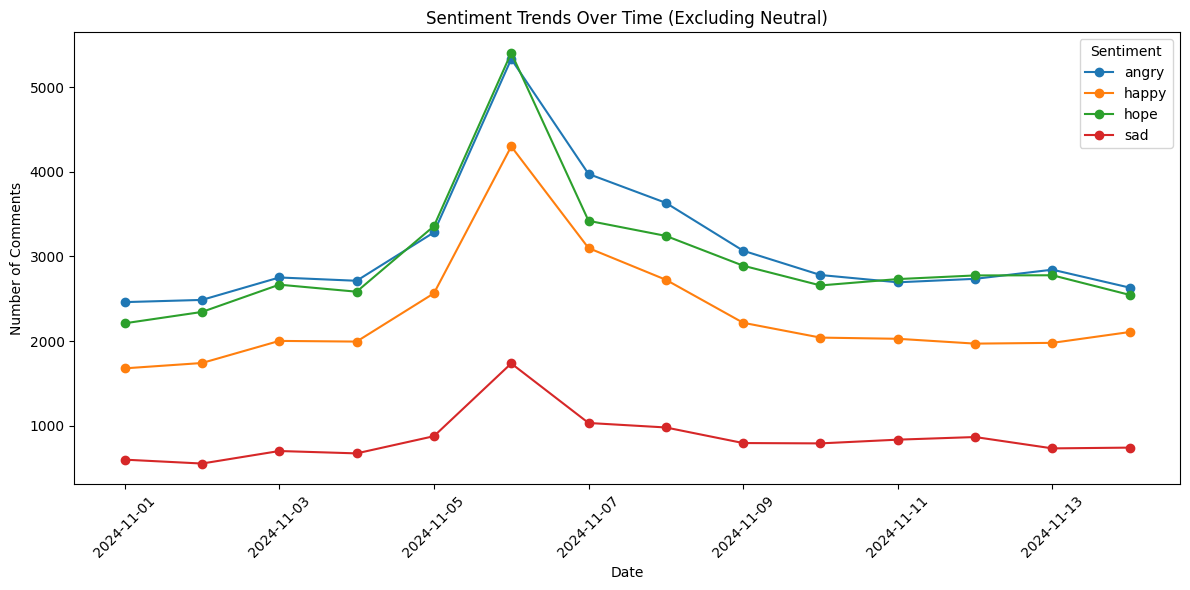

        date                   485123073 sentiment
0 2024-11-01               'com': 'saar'      None
1 2024-11-02               'com': 'fugg'      None
2 2024-11-02   'com': 'neosneedberalism'      None
3 2024-11-02              'com': 'sneed'      None
4 2024-11-02           'com': 'Buy an ad      None


In [32]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

def get_sentiment(comment):
    happy_keywords = [
        'happy', 'joy', 'fun', 'smile', 'excited', 'laugh', 'cheerful', 'delighted', 'thrilled', 'content',
        'ecstatic', 'grateful', 'glee', 'blissful', 'elated', 'overjoyed'
    ]
    sad_keywords = [
        'sad', 'cry', 'depressed', 'tears', 'unhappy', 'melancholy', 'mournful', 'sorrowful', 'heartbroken',
        'gloomy', 'despair', 'dismal', 'downhearted'
    ]
    angry_keywords = [
        'angry', 'furious', 'mad', 'rage', 'hate', 'annoyed', 'irritated', 'frustrated', 'outraged',
        'agitated', 'resentful', 'enraged', 'wrathful'
    ]
    hope_keywords = [
        'hope', 'optimism', 'wish', 'believe', 'dream', 'aspire', 'faith', 'positive', 'ambition', 'inspiration',
        'goal', 'trust', 'confidence'
    ]

    comment = comment.lower()

    if any(keyword in comment for keyword in happy_keywords):
        return 'happy'
    elif any(keyword in comment for keyword in sad_keywords):
        return 'sad'
    elif any(keyword in comment for keyword in angry_keywords):
        return 'angry'
    elif any(keyword in comment for keyword in hope_keywords):
        return 'hope'
    else:
        return None

df['sentiment'] = df[comments_column].apply(get_sentiment)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df_filtered = df[df['sentiment'].notna()]

sentiment_count = df_filtered.groupby([df_filtered['date'].dt.date, 'sentiment']).size().unstack().fillna(0)

date_range = pd.date_range(start=sentiment_count.index.min(), end=sentiment_count.index.max(), freq='D')

sentiment_count = sentiment_count.reindex(date_range, fill_value=0)

plt.figure(figsize=(12, 6))
for sentiment in sentiment_count.columns:
    plt.plot(sentiment_count.index, sentiment_count[sentiment], label=sentiment, marker='o')

plt.title('Sentiment Trends Over Time (Excluding Neutral)')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print(df[['date', comments_column, 'sentiment']].head())


Narrative counts:
{'red_wave': 76000, 'blue_wave': 8260, 'split_government': 20}


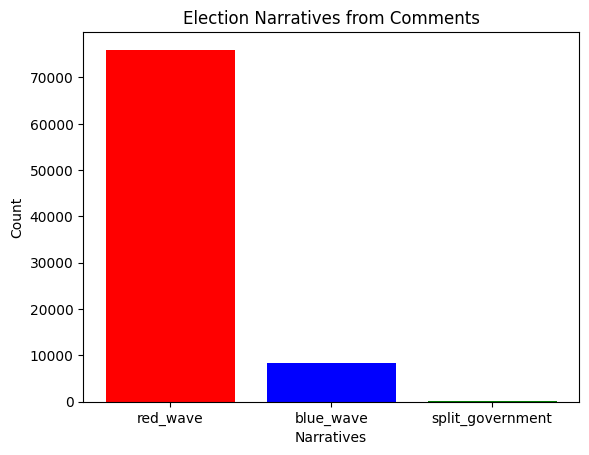

Number of rows in the DataFrame: 1805413


In [33]:
narratives = {
    'red_wave': ['red wave', 'Republican wave', 'GOP wave', 'Trump'],
    'blue_wave': ['blue wave', 'Democratic wave', 'Dems wave', 'Harris'],
    'split_government': ['split government', 'divided government', 'gridlock']
}

narrative_counts = {key: 0 for key in narratives}

for comment in comments:
    for narrative, keywords in narratives.items():
        if any(keyword.lower() in comment.lower() for keyword in keywords):
            narrative_counts[narrative] += 1

print("Narrative counts:")
print(narrative_counts)

plt.bar(narrative_counts.keys(), narrative_counts.values(), color=['red', 'blue', 'green'])
plt.title('Election Narratives from Comments')
plt.xlabel('Narratives')
plt.ylabel('Count')
plt.show()

num_rows = len(df)
print(f"Number of rows in the DataFrame: {num_rows}")


In [34]:
# import pandas as pd
# import matplotlib.pyplot as plt

# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df.set_index('date', inplace=True)

# print("DataFrame indexed by date:")
# print(df.head())


In [35]:
pip install plotly


In [37]:
import pandas as pd
import plotly.express as px

country_column = 'country'

if country_column in df.columns:
    country_comment_counts = df[country_column].value_counts()

    top_15_countries = country_comment_counts.iloc[2:22]



    top_15_countries_map = top_15_countries.reset_index()
    top_15_countries_map.columns = ['Country', 'CommentCount']

    fig = px.choropleth(top_15_countries_map,
                        locations="Country",
                        locationmode="country names",
                        color="CommentCount",
                        hover_name="Country",
                        color_continuous_scale="RdBu",
                        title="Top 15 Countries with Most Comments (Excluding US)")

    fig.show()

else:
    print(f"Column '{country_column}' not found in the dataset.")
